# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

## Q1. Is the distribution of temperature data, normal or not? 

#### We can take a look from this via the kde plot available via seaborn.
#### We can then perform normality tests to test our null hypotheses of whether the data is normal or not.

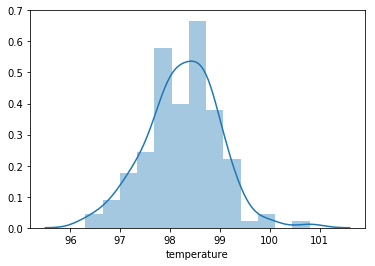

In [8]:
sns.distplot(df.temperature, hist=True)
plt.show()

#### From this we can see that the distribution is slightly skewed as there abnormal values to the right of the distribution. 
#### This doesn't mean however that the distribution isn't normal. It just means we shouldn't use purely visualisations to determine whether a population is normal or not. 

#### We can confirm this via a normality test. 
#### Null Hypothesis: The temperature data is normally distributed
#### Alternative Hypothesis: the temperature data is not normally distributed 

In [13]:
# Test for Normality using normal test.
# Normal test will return 2 outputs; k^2  = s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
# P value for Hypothesis Testing 
k2, p = stats.normaltest(df.temperature)
print ("The P value for the test is", p)


The P value for the test is 0.258747986349


#### Therefore, as the P value of 0.259 is > 0.05, there is not sufficient evidence to reject the Null Hypothesis that the distribution is normal.

## Q2. Is the sample size large? Are the observations independent? 

In [15]:
print (len(df.temperature))
df.head()

130


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### Looking at the below we can see that the sample size is not large by any means, but for the purpose of statistical significance is sufficient. (n > 30) 

#### Observations are also independent.


# Q3. Is the true population mean really 98.6 degrees F? 
#### First, try a bootstrap hypothesis test. 
#### Would you use a one-sample or two-sample test? Why? 
#### In this situation, is it appropriate to use the t-test or z-test statistic. 
#### Now try using the other test. How is the result be different? Why? 

It is important to note in this situation we assume that the 'population' is 130 people

Taking the entire population mean via the population mean formula gives us:


In [16]:
print (df.temperature.mean())

98.24923076923078


#### So with this in mind, no, the population mean is not 98.6 but rather 98.2

In [77]:
# Let's use the boot strapping approach and test this 100 times
for x in range(100):
    # Generate bootstrap sample: bootstrap
    bootstrap = np.random.choice(df.temperature, size=len(df.temperature))
    bootstrap_means =  (bootstrap.mean())
#     print (bootstrap_means)

print (bootstrap_means.mean())

98.2323076923


#### So what we see here is that even with 100 simulations - the mean is still ~ 98.2

As to whether we would use a Z-Test or T-Test, this depends on a number of factors:

    T- test: Rule of Thumb - If the Sample Size is < 30, Use a T-Test (The Formula for calculation of the T-Test and Z-Test are essentially identical). As the sample is > 30, the score(s) should approximate to that of the Z score. 
    Z - test: Use the Z-Test if the Sample Size is > 30. In this case as the Sample Size is 129 (excl. Outliers) which fits 
    the criteria for using a Z-Test.
    

# Z-Test Example


#### Null Hypothesis: True Popualation Mean is 98.6
#### Alternative Hypothesis: True Population Mean is NOT 98.6

In [26]:
# We will use the Z test from statsmodel 
# (http://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ztest.html)
from statsmodels.stats.weightstats import ztest
z = ztest(df.temperature,value=98.6)
print("Z-score is : %4.2F  p-value is: %4.2F" % (abs(z[0]),z[1]))

Z-score is : 5.45  p-value is: 0.00


With a P value < 0.05 ( Assuming a 95% Confidence Interval), there does not exist sufficient evidence to reject the null hypothesis.

Hence the true population mean is 98.6

# Q4. At what temperature should we consider someone's temperature to be "abnormal"? 
#### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
#### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you  should use the appropriate formula for one draw, and not N draws. 

In [41]:
# We will use a function sourced from : https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
# This will provide the Margins at a 95% Confidence Interval

import numpy as np
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean_confidence_interval(df.temperature)


(98.249230769230749, 98.122002905608014, 98.376458632853485)

So normal Temperatures should range from 98.24 F to 98.37 F.


# Q5. Is there a significant difference between males and females in normal temperature? 


Uses of the T-Test exist for these type of questions.

An independent samples t-test is used when you want to compare the means of a normally distributed interval dependent variable for two independent groups.

We will assume the following hypotheses:

Null Hypotheses: There exists no significant difference between males / females in normal temperature

Alternate Hypotheses: There exists significant differences between males / females in temperature


In [5]:
from scipy.stats import ttest_ind

t_test = ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])
print (t_test[1])


0.0239318831224


With a P-Value of 0.0239, this is < 0.05, meaning the null hypotheses can be rejected. 
Therefore, there is a significant difference between male and female body temperatures.